# Exercise 14

## Angelita Gozaly
## s1282003

### Ensure the repository is succesfully installed.

In [8]:
 !pip install s1282003_learn

Defaulting to user installation because normal site-packages is not writeable


### Print contents of repository.

In [9]:
!pip show s1282003_learn

Name: s1282003-learn
Version: 2023.8.5.3
Summary: This software is being developed at the University of Aizu, Aizu-Wakamatsu, Fukushima, Japan
Home-page: https://github.com/angelitagozaly/s1282003_learn
Author: Angelita Gozaly
Author-email: s1282003@u-aizu.ac.jp
License: GPLv3
Location: /home/student/s1282003/.local/lib/python3.10/site-packages
Requires: matplotlib, numpy, pami, pandas, Pillow, plotly, psutil, resource, urllib3, validators
Required-by: 


### Using the package

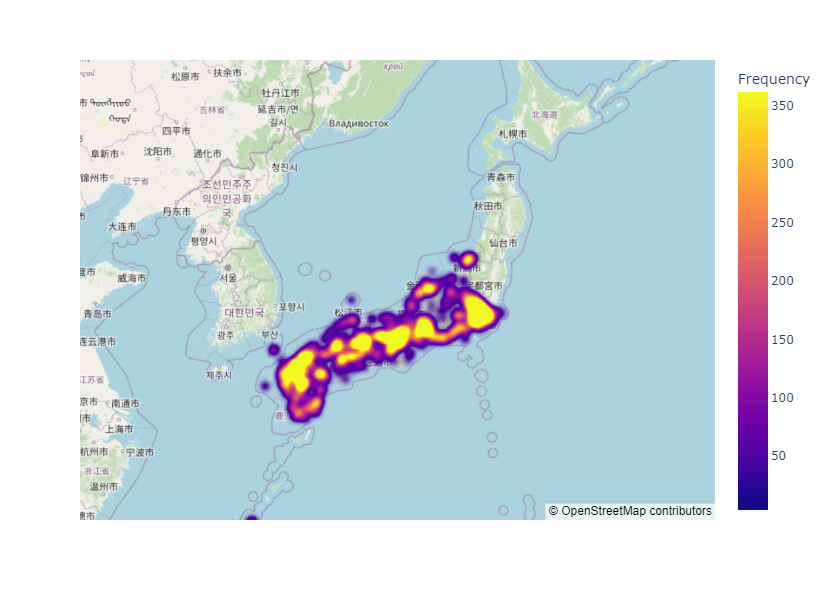

In [12]:
# Import the package
from s1282003_learn.statistics.frequenciesOfItems import frequenciesOfItems
from s1282003_learn.visualization.heatMapItemsFrequencies import HeatMapItemsFrequencies

filename = 'PM24HeavyPollutionRecordingSensors.csv'
separator = '\t'

# Create the dictionary using the imported package
items_frequencies_dict = frequenciesOfItems(filename, separator).process_file()

# Create the heatmap using the imported package
heatmap = HeatMapItemsFrequencies(filename, separator).plot_heatmap()

### Implementing FP-Growth Algorithm

In [16]:
from PAMI.frequentPattern.basic import FPGrowth as alg

class PatternMining:
    """
    PatternMining class for mining frequent patterns using FP-growth algorithm.

    Attributes
    ----------
    input_file
        The name of the input file containing the transactional database.
        
    Methods
    -------
    __init__(input_file)
        The constructor of the PatternMining class.
    mine_frequent_patterns()
        Function to mine the frequent patterns from the transactional database, using FP-growth algorithm.
    """

    def __init__(self, input_file):
        """
        Initialize the PatternMining class.

        Parameters
        ----------
        input_file
            The name of the input file containing the transactional database.
        """
        
        self.input_file = input_file

    def mine_frequent_patterns(self):
        """
        Mine frequent patterns using FP-growth with the selected minSup count.
        """
        minSup = 160

        # Create the object of the mining algorithm
        obj = alg.FPGrowth(iFile=self.input_file, minSup=minSup, sep='\t')

        # Start the mining process
        obj.startMine()
        
        # Save frequent patterns as txt file
        obj.save('frequentPatterns.txt')

        # Print the number of patterns, runtime, and memory consumed
        frequentPatternsDF= obj.getPatternsAsDataFrame()
        print('Total No of patterns: ' + str(len(frequentPatternsDF))) # print the total number of patterns
        print('Runtime: ' + str(obj.getRuntime())) # print the runtime
        print('Memory (RSS): ' + str(obj.getMemoryRSS()))
        print('Memory (USS): ' + str(obj.getMemoryUSS()))
        
if __name__ == "__main__":
    input_file = 'PM24HeavyPollutionRecordingSensors.csv'
    
    # Initialize the PatternMining class
    pattern_mining = PatternMining(input_file)

    # Mine frequent patterns using FP-growth and get the results
    pattern_mining.mine_frequent_patterns()


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 9296
Runtime: 1.796708345413208
Memory (RSS): 236658688
Memory (USS): 176287744


### Visualize the longest pattern on plotly street map

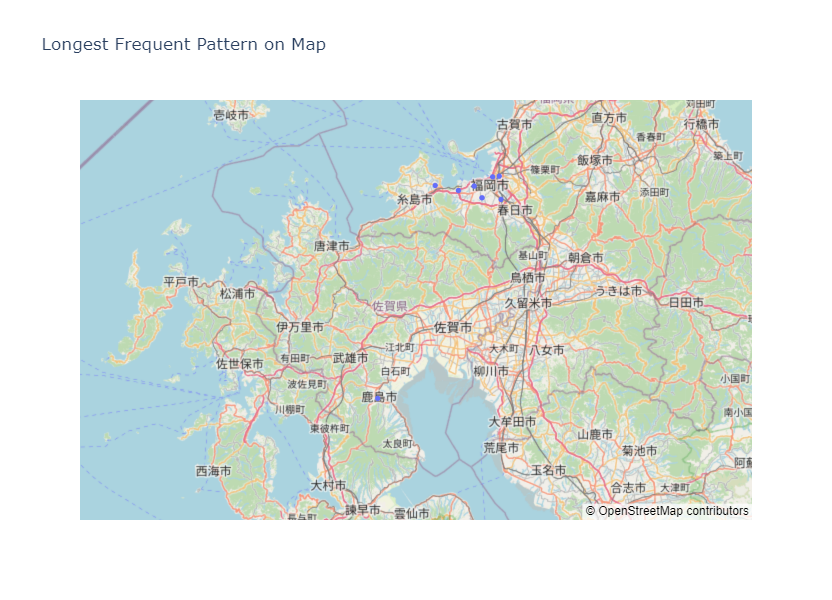

In [17]:
import plotly.express as px
import pandas as pd

class PatternVisualization:
    """
    A class for finding and plotting the longest frequent pattern.

    Attributes
    ----------
    file_path
        The path to the frequentPatterns.txt file.

    Methods
    -------
    find_longest_pattern()
        Find the longest frequent pattern in the file and return it.
    extract_points()
        Extract longitude and latitude from each point in the pattern.
    plot_longest_pattern_on_map()
        Plot the longest frequent pattern on an OpenStreetMap using Plotly Express.
    """

    def __init__(self, file_path):
        """
        Initialize the PatternVisualization class.

        Parameters
        ----------
        file_path
            The path to the frequentPatterns.txt file.
        """
        self.file_path = file_path

    def find_longest_pattern(self):
        """
        Find the longest frequent pattern in the frequentPatterns.txt file.

        Returns
        -------
        longest_pattern
            The longest frequent pattern found.
        """
        longest_pattern = None
        with open(self.file_path, 'r') as file:
            for line in file:
                # Extract the pattern from each line
                pattern_info = line.strip().split(':')
                pattern = pattern_info[0].strip()

                # Check if the current pattern is longer than the previous longest pattern
                if longest_pattern is None or len(pattern.split()) > len(longest_pattern.split()):
                    longest_pattern = pattern

        return longest_pattern

    def extract_points(self):
        """
        Extract longitude and latitude from each point in the pattern.

        Returns
        -------
        df
            A DataFrame containing columns 'longitude' and 'latitude'.
        """
        longest_pattern = self.find_longest_pattern()
        # Split the longest pattern by points
        points = longest_pattern.split('\t')

        # Extract longitude and latitude from each point and store them in separate lists
        data = []
        for point in points:
            # Remove "Point(" and ")" from the point string and split by space
            coordinates = point.replace("Point(", "").replace(")", "").strip().split()
            longitude, latitude = float(coordinates[0]), float(coordinates[1])
            data.append({'longitude': longitude, 'latitude': latitude})

        df = pd.DataFrame(data)
        return df

    def plot_longest_pattern_on_map(self):
        """
        Plot the longest frequent pattern on an OpenStreetMap using Plotly Express.
        """
        df = self.extract_points()
        fig = px.scatter_mapbox(
            data_frame=df,
            lat='latitude',
            lon='longitude',
            center={'lat': 33.3, 'lon': 130.2},
            zoom=8,
            mapbox_style="open-street-map",
            title="Longest Frequent Pattern on Map",
            height=600,
            width=800
        )
        fig.show()

if __name__ == "__main__":
    file_path = 'frequentPatterns.txt'

    # Create the PatternVisualization object
    pattern_visualization = PatternVisualization(file_path)

    # Plot the longest pattern on an OpenStreetMap using Plotly Express
    pattern_visualization.plot_longest_pattern_on_map()
